In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
from sklearn import metrics

In [3]:
import math

In [4]:
%matplotlib inline

In [5]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 
              'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 
              'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 
              'sqft_lot':int, 'view':int}

In [6]:
sales=pd.read_csv("D:\Regression\kc_house_data.csv",dtype=dtype_dict)

In [7]:
train_data=pd.read_csv("D:\Regression\kc_house_train_data.csv",dtype=dtype_dict)

In [8]:
test_data=pd.read_csv("D:\Regression\kc_house_test_data.csv",dtype=dtype_dict)

In [9]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


###### Squaring bedrooms will increase the seperation between not many bedrooms (1) and lots of bedrooms (4). Consequently this variable will mostly affect houses with many bedrooms

In [10]:
test_data['bedrooms_squared']=test_data['bedrooms']*test_data['bedrooms']

In [11]:
train_data['bedrooms_squared']=train_data['bedrooms']*train_data['bedrooms']

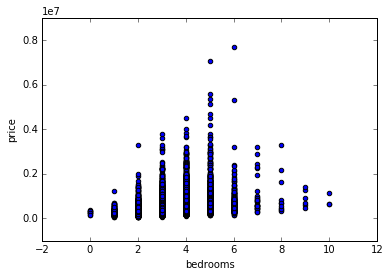

In [12]:
train_data.plot('bedrooms','price','scatter')

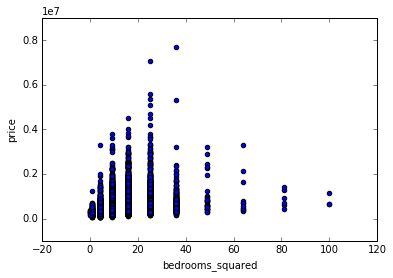

In [13]:
train_data.plot('bedrooms_squared','price','scatter')

In [14]:
bedrooms_mean_square=train_data['bedrooms_squared'].mean()

In [15]:
bedrooms_mean=train_data['bedrooms'].mean()

In [16]:
print bedrooms_mean

3.36936263231


In [17]:
print bedrooms_mean_square

12.1742406811


In [18]:
print "bedrooms_root_mean_square=",math.sqrt(bedrooms_mean_square)

bedrooms_root_mean_square= 3.48916045505


###### Bedrooms times bathrooms is what's called an "interaction" variable. It is large when both of them are large.

In [19]:
test_data['bed_bath_rooms']=test_data['bedrooms']*test_data['bathrooms']

In [20]:
train_data['bed_bath_rooms']=train_data['bedrooms']*train_data['bathrooms']

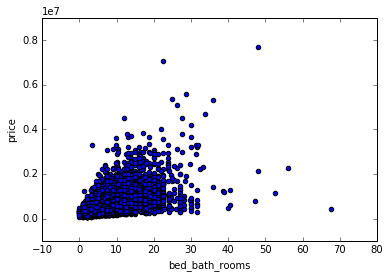

In [21]:
train_data.plot('bed_bath_rooms','price','scatter')

In [22]:
bed_bath_rooms_mean=train_data['bed_bath_rooms'].mean()

In [23]:
print bed_bath_rooms_mean

7.49659169351


###### Taking the log of square feet has the effect of bringing large values closer together and spreading out small values.

In [24]:
test_data['log_sqft_living']=test_data['sqft_living'].apply(lambda x: math.log(x))

In [25]:
train_data['log_sqft_living']=train_data['sqft_living'].apply(lambda x: math.log(x))

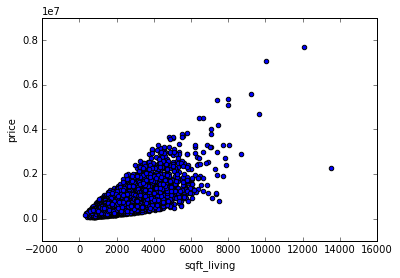

In [26]:
train_data.plot('sqft_living','price','scatter')

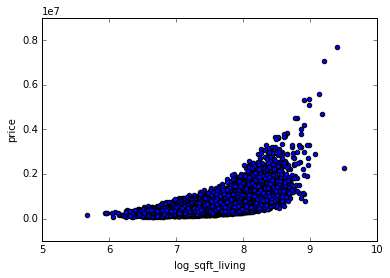

In [27]:
train_data.plot('log_sqft_living','price','scatter')

In [28]:
log_sqft_living_mean=train_data['log_sqft_living'].mean()

In [29]:
print log_sqft_living_mean

7.55034931768


###### To make one dependent coulmn and see if overfitting happens or not.

In [30]:
test_data['lat_plus_long']=test_data['lat']+test_data['long']

In [31]:
train_data['lat_plus_long']=train_data['lat']+train_data['long']

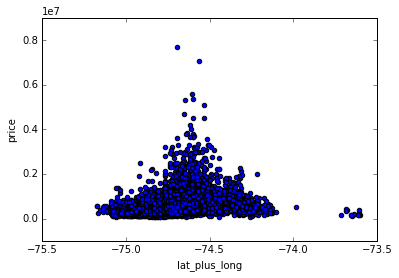

In [32]:
train_data.plot('lat_plus_long','price','scatter')

In [33]:
lat_plus_long_mean=train_data['lat_plus_long'].mean()

In [34]:
print lat_plus_long_mean

-74.6539680338


In [35]:
ty=test_data[['price']]

In [36]:
y=train_data[['price']]

In [37]:
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [38]:
t1=test_data[['sqft_living','bedrooms','bathrooms','lat','long']]

In [39]:
x1=train_data[['sqft_living','bedrooms','bathrooms','lat','long']]

In [40]:
x1.head()

,sqft_living,bedrooms,bathrooms,lat,long
0,1180.0,3.0,1.00,47.5112,-122.257
1,2570.0,3.0,2.25,47.7210,-122.319
2,770.0,2.0,1.00,47.7379,-122.233
3,1960.0,4.0,3.00,47.5208,-122.393
4,1680.0,3.0,2.00,47.6168,-122.045


In [41]:
linear_reg1=linear_model.LinearRegression()

In [42]:
linear_reg1=linear_reg1.fit(x1,y)

In [43]:
t2=test_data[['sqft_living','bedrooms','bathrooms','lat','long','bed_bath_rooms']]

In [44]:
x2=train_data[['sqft_living','bedrooms','bathrooms','lat','long','bed_bath_rooms']]

In [45]:
x2.head()

,sqft_living,bedrooms,bathrooms,lat,long,bed_bath_rooms
0,1180.0,3.0,1.00,47.5112,-122.257,3.00
1,2570.0,3.0,2.25,47.7210,-122.319,6.75
2,770.0,2.0,1.00,47.7379,-122.233,2.00
3,1960.0,4.0,3.00,47.5208,-122.393,12.00
4,1680.0,3.0,2.00,47.6168,-122.045,6.00


In [46]:
linear_reg2=linear_model.LinearRegression()

In [47]:
linear_reg2=linear_reg2.fit(x2,y)

In [48]:
t3=test_data[['sqft_living','bedrooms','bathrooms','lat','long','bed_bath_rooms','bedrooms_squared','log_sqft_living','lat_plus_long']]

In [49]:
x3=train_data[['sqft_living','bedrooms','bathrooms','lat','long','bed_bath_rooms','bedrooms_squared','log_sqft_living','lat_plus_long']]

In [50]:
x3.head()

,sqft_living,bedrooms,bathrooms,lat,long,bed_bath_rooms,bedrooms_squared,log_sqft_living,lat_plus_long
0,1180.0,3.0,1.00,47.5112,-122.257,3.00,9.0,7.073270,-74.7458
1,2570.0,3.0,2.25,47.7210,-122.319,6.75,9.0,7.851661,-74.5980
2,770.0,2.0,1.00,47.7379,-122.233,2.00,4.0,6.646391,-74.4951
3,1960.0,4.0,3.00,47.5208,-122.393,12.00,16.0,7.580700,-74.8722
4,1680.0,3.0,2.00,47.6168,-122.045,6.00,9.0,7.426549,-74.4282


In [51]:
linear_reg3=linear_model.LinearRegression()

In [52]:
linear_reg3=linear_reg3.fit(x3,y)

In [53]:
linear_reg1.coef_

array([[  3.12258646e+02,  -5.95865332e+04,   1.57067421e+04,
          6.58619264e+05,  -3.09374351e+05]])

In [54]:
linear_reg2.coef_

array([[  3.06610053e+02,  -1.13446368e+05,  -7.14613083e+04,
          6.54844630e+05,  -2.94298969e+05,   2.55796520e+04]])

###### In model 1 coeff of bathrooms is +ve but in model 2 it is -ve. If we keep value of features constant except #bathrooms then in model 2 we have to reduce #bedrooms to keep bed_bath_rooms constant. So having 4 bathrooms with 2 bedrooms may reduce the value of home because 4 bathrooms is an overkill. 

In [55]:
rss_train_1=metrics.mean_squared_error(y,linear_reg1.predict(x1))

In [56]:
rss_test_1=metrics.mean_squared_error(ty,linear_reg1.predict(t1))

In [57]:
rss_train_2=metrics.mean_squared_error(y,linear_reg2.predict(x2))

In [58]:
rss_test_2=metrics.mean_squared_error(ty,linear_reg2.predict(t2))

In [59]:
rss_train_3=metrics.mean_squared_error(y,linear_reg3.predict(x3))

In [60]:
rss_test_3=metrics.mean_squared_error(ty,linear_reg3.predict(t3))

In [61]:
rss_train_1,rss_train_2,rss_train_3

(55676481997.787941, 55132284576.281006, 51969423323.198303)

In [62]:
rss_test_1,rss_test_2,rss_test_3

(53322409504.726868, 52820397960.857574, 61299673494.249138)

In [63]:
rss_train_3<rss_train_2 and rss_train_3<rss_train_1

True

In [64]:
rss_test_3>rss_test_2 and rss_test_3>rss_test_1

True

###### In model 3 we have overfit the model

# Implementing ML algo gradient desent to minimize rss

In [65]:
def get_numpy_data(df,features,output):
    '''
    i/p: df: data table in data frame format
            features: x input name list. According to this list a feature matrix will be created in numpy 2D aray
            output: single target name which will be converted into numpy vector
    o/p: feature matrix, y vector in numpy array format'''
    df['constant']=1   #add a constant field for the intercept
    features=['constant']+features
    feature_matrix=df.as_matrix(columns=features)
    y_vector=df[output].values
    return feature_matrix,y_vector    

In [66]:
def predict_outcome(feature_matrix,weights):
    '''
    i/p: feature_matrix: matrix F of equation Fw=y
         weights is a one D w vector in above equation
    o/p: predicted value y in above eq.
    '''
    y_hat=np.dot(feature_matrix,weights)
    return y_hat

In [67]:
def derivative_of_rss_wrt_weights(errors,feature):
    '''
    i/p: errors=y-y_hat
         features=F
    o/p: d(RSS)/dw= -2H'(errors) Note:d is partial derivative and H' = transpose(H)
    '''
    errors=(-2)*errors
    derivative=np.dot(errors,feature)
    return derivative

In [68]:
def gradient_descent(feature_matrix,output,initial_weights,step_size,tolerence):
    '''
    y=Fw
    feature_matrix: F
    output:y
    initial_weights: w
    step_size: how fast we want to converge the gradient descent algo
    tolerence: when terminate
    '''
    converged= False
    weights=np.array(initial_weights)
    while not converged:
        predictions=predict_outcome(feature_matrix,weights)   #prediction
        errors=output-predictions
        derivative=derivative_of_rss_wrt_weights(errors,feature_matrix)
        weights-=step_size*derivative
        gradient_sum_square=derivative.dot(derivative)
        gradient_magnitude=math.sqrt(gradient_sum_square)
        if gradient_magnitude<tolerence: converged=True
    return weights
        

### Example1 (finding weight of a single feature model and then computing rss on test data)

In [69]:
simple_features = ['sqft_living']
my_output= 'price'
initial_weights = np.array([-47000., 1.])
step_size = 7e-12
tolerance = 2.5e7

In [70]:
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)

In [71]:
simple_weights = gradient_descent(simple_feature_matrix, output,initial_weights, step_size,tolerance)

In [72]:
print simple_weights

[-46999.88716555    281.91211918]


###### From project Estimating-House-Price-based-on-sqft_living-and-no-of-bedrooms weights were (-47116.07907287835, 281.958839630335).
###### Remember that the weights in the previous project is calculated by the eq. derivative=0 and in this project is using gradient descent.

In [73]:
test_simple_feature_matrix, test_output=get_numpy_data(test_data,simple_features,my_output)

In [74]:
predicted_output=predict_outcome(test_simple_feature_matrix,simple_weights)

In [75]:
print predicted_output

[ 356134.443255    784640.86440132  435069.83662406 ...,  663418.65315598
  604217.10812919  240550.47439317]


In [76]:
test_residuals=test_output-predicted_output

In [77]:
test_rss=(test_residuals**2).sum()

In [78]:
test_rss

275400044902128.31

###### From previous simple regression model rss was 275402933617811.75
###### change in percentage is approx 0.001% (see below)

In [79]:
((275400044902128.31-275402933617811.75)/275402933617811.75)*100

-0.0010489051970108251

### Example 2(multiple regression model and computing rss)

In [80]:
model_features = ['sqft_living', 'sqft_living15'] #sqft_living_15 is the average square feet of the nearest 15 neighbouring houses
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features,my_output)
initial_weights = np.array([-100000., 1., 1.])
step_size = 4e-12
tolerance = 1e9

In [81]:
weights = gradient_descent(feature_matrix, output,initial_weights, step_size,tolerance)

In [82]:
print weights

[ -9.99999688e+04   2.45072603e+02   6.52795267e+01]


In [83]:
test_feature_matrix, test_output=get_numpy_data(test_data,model_features,my_output)

In [84]:
predicted_output_2=predict_outcome(test_feature_matrix,weights)

In [85]:
print predicted_output_2

[ 366651.41162949  762662.39850726  386312.09557541 ...,  682087.39916306
  585579.27901327  216559.20391786]


In [86]:
print test_output  #for ist house model 1 is closer

[ 310000.  650000.  233000. ...,  610685.  400000.  402101.]


In [92]:
test_residuals=test_output-predicted_output_2

In [93]:
test_rss_2=(test_residuals**2).sum()

In [96]:
test_rss_2

270263443629803.56

In [97]:
test_rss_2<test_rss

True

###### model 2 is more accurate then model 1